In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import zipfile
import os

# 🔁 Replace this with the full path to your downloaded Kaggle ZIP file
zip_path = r"C:\Users\Neetu\Downloads\archive (6).zip"

# Folder to extract contents
extract_to = 'dataset'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Check what files were extracted (for confirmation/debug)
print("Extracted files:")
for name in zip_ref.namelist():
    print(name)

# 📥 Path to the CSV inside the extracted folder (adjust if needed)
csv_path = os.path.join(extract_to, 'spam.csv')

# Load the CSV
df = pd.read_csv(csv_path, encoding='latin-1')

# Clean up and rename columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Show the first few rows
print(df.head())


Extracted files:
spam.csv
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
df.sample(5)

,label,message
73,ham,K..k:)where are you?how did you performed?
5414,ham,East coast
4321,ham,Sorry . I will be able to get to you. See you ...
2076,ham,"Trust me. Even if isn't there, its there."
207,ham,"Aight yo, dats straight dogg"


In [4]:
df.shape

(5572, 2)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
print(df.columns)


Index(['label', 'message'], dtype='object')


In [7]:
df.sample(5)

,label,message
1265,ham,Im in inperialmusic listening2the weirdest tra...
4026,ham,"Yes, princess. Are you going to make me moan?"
3770,ham,"Hi, wlcome back, did wonder if you got eaten b..."
2334,ham,Do you like Italian food?
4628,ham,Only saturday and sunday holiday so its very d...


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,label,message
5260,ham,If anyone calls for a treadmill say you'll buy...
3396,ham,Heehee that was so funny tho
1144,ham,Really... I tot ur paper ended long ago... But...
1468,spam,Hi its LUCY Hubby at meetins all day Fri & I w...
5317,ham,"K, fyi I'm back in my parents' place in south ..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])  # Not 'target'


In [11]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

403

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## 2.EDA

In [17]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['label'].value_counts()


label
0    4516
1     653
Name: count, dtype: int64

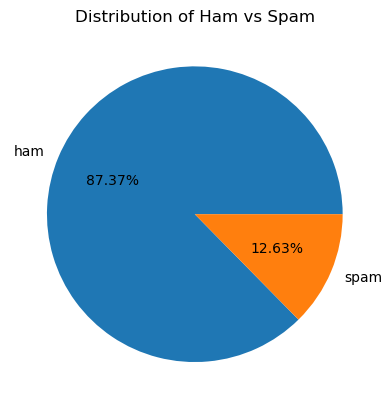

In [19]:
import matplotlib.pyplot as plt

# Plot pie chart for label distribution
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f%%")
plt.title('Distribution of Ham vs Spam')
plt.show()


In [20]:
# Data is imbalanced

In [21]:
import nltk

In [22]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [23]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Neetu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['message'].apply(len)


In [25]:
df.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#import pandas as pd
import nltk

# Download tokenizer model
nltk.download('punkt')

import zipfile
import os

zip_path = r"C:\Users\Neetu\Downloads\archive (6).zip"      # Replace with your actual zip file name
extract_to = 'dataset'             # Folder to extract contents into

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Optional: Check extracted files
print(os.listdir(extract_to))
print("Extracted files:")
for name in zip_ref.namelist():
    print(name)

# 📥 Path to the CSV inside the extracted folder (adjust if needed)
csv_path = os.path.join(extract_to, 'spam.csv')

# Load the CSV
df = pd.read_csv(csv_path, encoding='latin-1')

# Clean up and rename columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Show the first few rows
print(df.head())





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Neetu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['spam.csv']
Extracted files:
spam.csv
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [27]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
import nltk
nltk.download('punkt')        # For sentence and word tokenization
nltk.download('punkt_tab')
print(nltk.data.path)
df['num_characters'] = df['message'].apply(len)
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(str(x))))
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(str(x))))




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Neetu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Neetu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['C:\\Users\\Neetu/nltk_data', 'c:\\ProgramData\\anaconda3\\nltk_data', 'c:\\ProgramData\\anaconda3\\share\\nltk_data', 'c:\\ProgramData\\anaconda3\\lib\\nltk_data', 'C:\\Users\\Neetu\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [30]:
# If the column is named 'label' and contains 'ham' and 'spam'
print(df['label'].unique())  # To inspect the values

# Then map to numeric if needed
df['target'] = df['label'].map({'ham': 0, 'spam': 1})
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

['ham' 'spam']


,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns  


<Axes: xlabel='num_characters', ylabel='Count'>

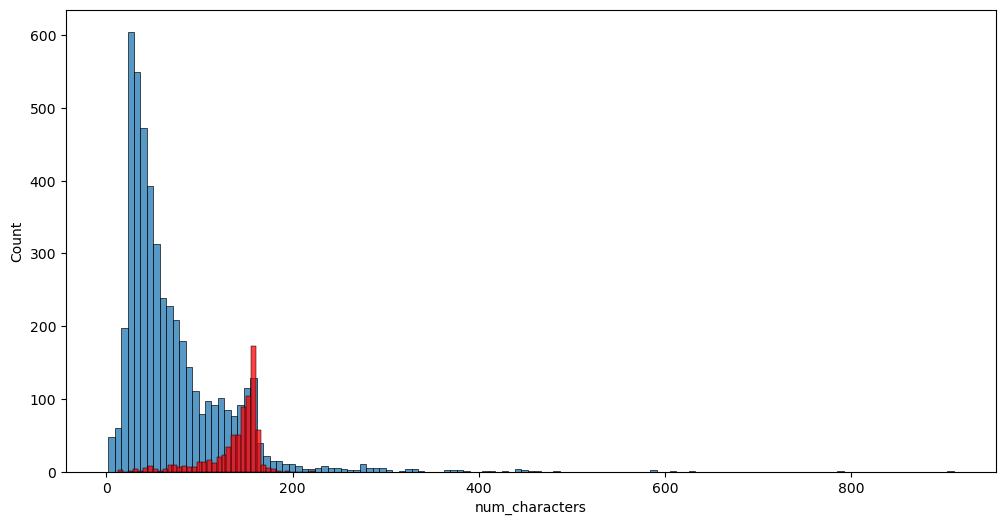

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

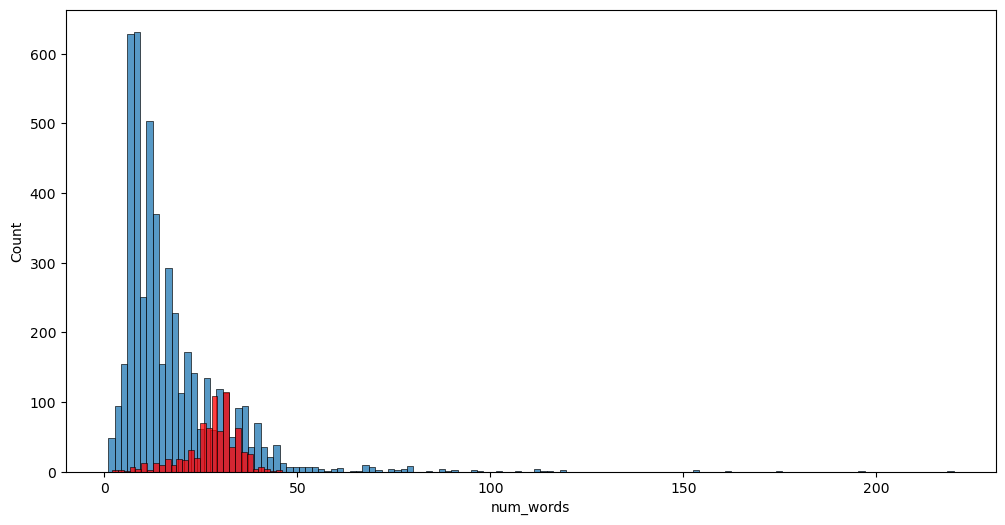

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

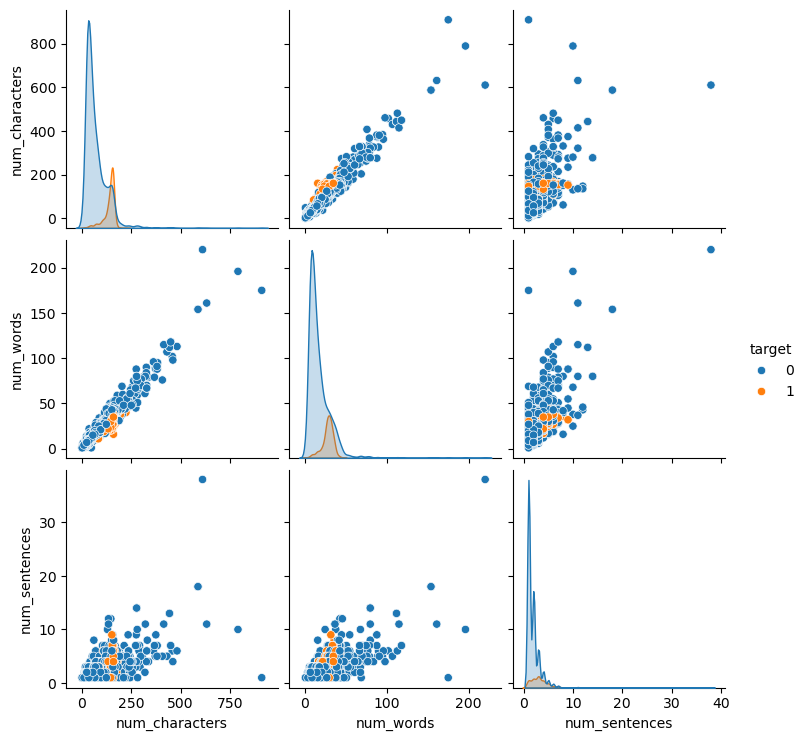

In [35]:
sns.pairplot(df,hue='target')

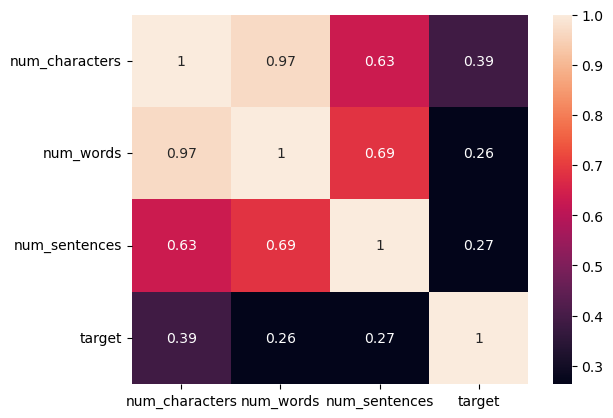

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Create the heatmap
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [38]:
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')

def transform_text(text):
    y = []
    for i in text.split():
        i = i.lower()
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return " ".join(y)

# Test
transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Neetu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'gonna home soon want talk stuff anymore tonight, k? cried enough today.'

In [39]:
df['message'][10]


"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [41]:
df['transformed_text'] = df['message'].apply(transform_text)


In [42]:
df.head()

,label,message,num_characters,num_words,num_sentences,target,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,"go jurong point, crazy.. available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u dun say early hor... u c already say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,"nah think goes usf, lives around though"


In [43]:
!pip install wordcloud
from wordcloud import WordCloud


Defaulting to user installation because normal site-packages is not writeable


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

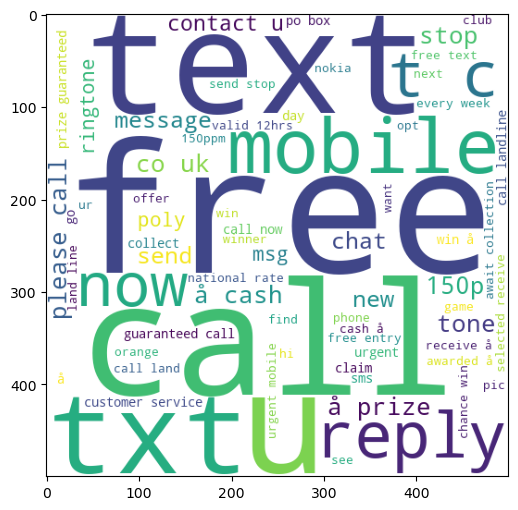

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

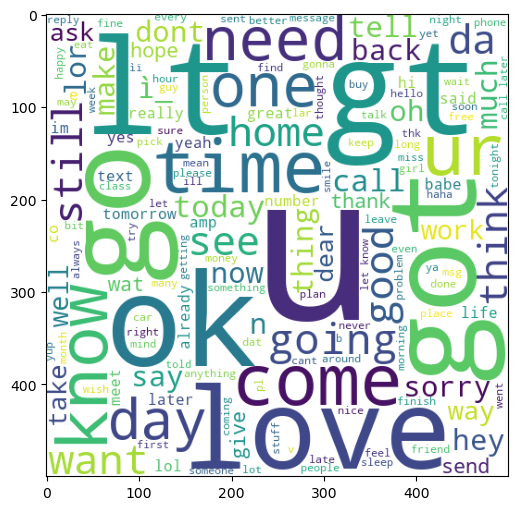

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
df.head()

,label,message,num_characters,num_words,num_sentences,target,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,"go jurong point, crazy.. available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u dun say early hor... u c already say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,"nah think goes usf, lives around though"


In [50]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [51]:
len(spam_corpus)

12806

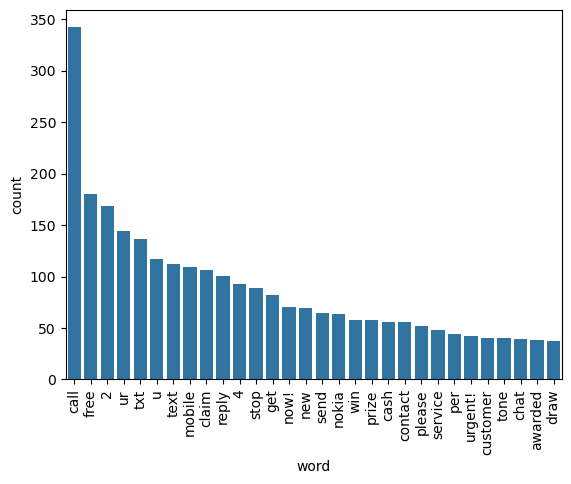

In [52]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Get the 30 most common words from spam_corpus
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x='word', y='count', data=common_words)
plt.xticks(rotation='vertical')
plt.show()


In [53]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

40664

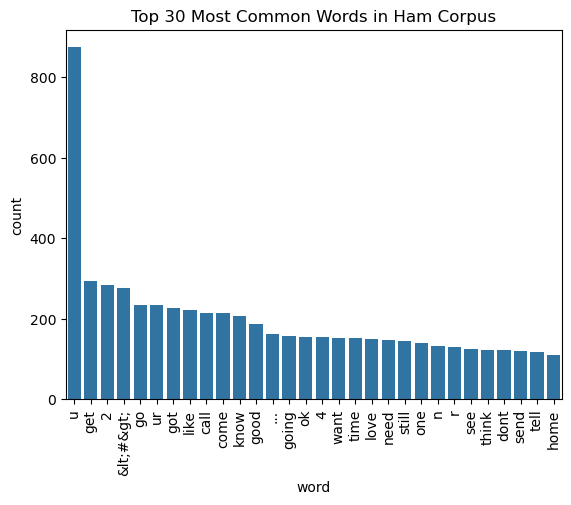

In [55]:
from collections import Counter
common_words = Counter(ham_corpus).most_common(30)
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot with keyword arguments
sns.barplot(x='word', y='count', data=df_common)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.show()

In [56]:
# Text Vectorization
# using Bag of Words
df.head()

,label,message,num_characters,num_words,num_sentences,target,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,"go jurong point, crazy.. available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u dun say early hor... u c already say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,"nah think goes usf, lives around though"


## 4. Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
X.shape

(5572, 3000)

In [60]:
y = df['target'].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8807174887892377
[[849 108]
 [ 25 133]]
0.5518672199170125


In [66]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9721973094170404
[[957   0]
 [ 31 127]]
1.0


In [67]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.97847533632287
[[955   2]
 [ 22 136]]
0.9855072463768116


In [68]:
# tfidf --> MNB

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [71]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [73]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9730941704035875, 0.9923076923076923)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9730941704035875
Precision -  0.9923076923076923
For  KN
Accuracy -  0.9076233183856502
Precision -  1.0
For  NB
Accuracy -  0.9721973094170404
Precision -  1.0


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))